In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimate_coef(x, y):
    xmean = np.mean(x)
    ymean = np.mean(y)
    
    a = ((x-xmean)*(y-ymean)).sum() / ((x-xmean)**2).sum()
    b = ymean - a*xmean
    return a,b

In [3]:
def plot_lines(x, y, coef):
    plt.figure(figsize=(7,7))
    plt.scatter(x,y, c='g')
    
    a,b = coef
    y_pred = a*x + b
    plt.plot(x, y_pred, c='r')
    plt.show()

In [6]:
np.random.seed(42)
N = 150
X = 6*np.random.randn(N) - 3
y = 2*X + np.random.randn(N)*3

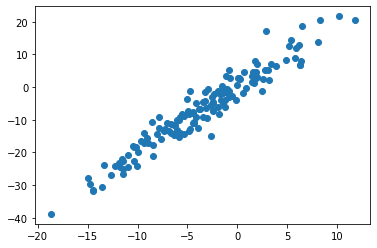

In [7]:
plt.scatter(X, y)

In [8]:
coef = estimate_coef(X, y)
coef

(1.9870820836236875, 0.168554548328828)

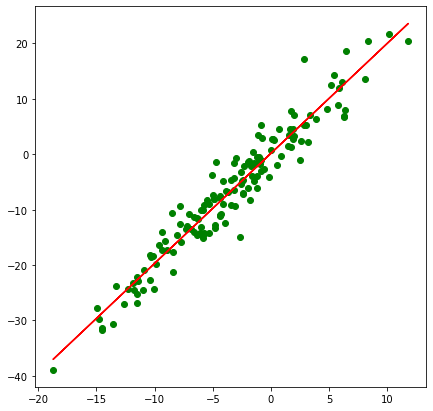

In [9]:
plot_lines(X, y, coef)

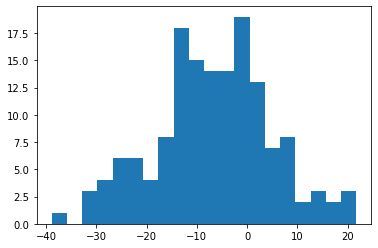

In [12]:
plt.hist(y, bins=20);

In [13]:
from scipy.stats import pearsonr

In [14]:
pearsonr(X, y)

(0.9647603482275336, 1.0391765316919123e-87)

### Użycie biblioteki scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression

In [19]:
X.ndim

1

In [21]:
model = LinearRegression()
model.fit(X.reshape(-1,1) , y)

LinearRegression()

In [22]:
model.coef_ , model.intercept_

(array([1.98708208]), 0.16855454832882977)

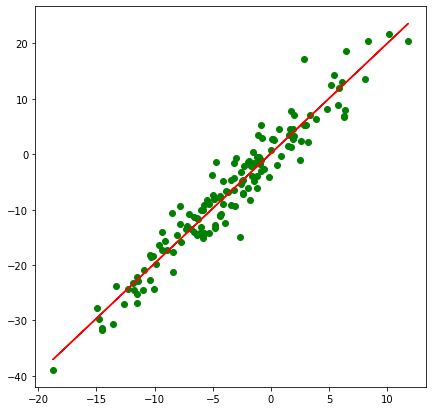

In [23]:
plot_lines(X,y, (model.coef_[0],model.intercept_ ) )

In [24]:
# importowanie metryk
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
y_pred = model.predict(X.reshape(-1,1))

In [30]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred)

(2.4011498652518806, 9.327145002043936)

In [31]:
r2_score(y, y_pred)

0.9307625295121121

 ### Efekt lejka

In [32]:
import pandas as pd

In [35]:
df = pd.read_csv(r"http://51.91.120.89/extras/advertising.csv", 
                 usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [38]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [39]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [40]:
model.coef_, model.intercept_

(array([0.04753664]), 7.0325935491276965)

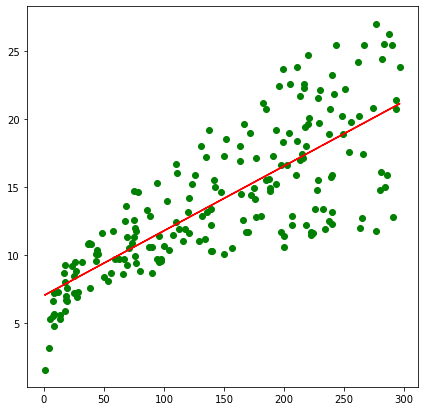

In [41]:
plot_lines(X, y, (model.coef_[0], model.intercept_) )

In [42]:
y_pred = model.predict(X)
r2_score(y, y_pred)

0.611875050850071

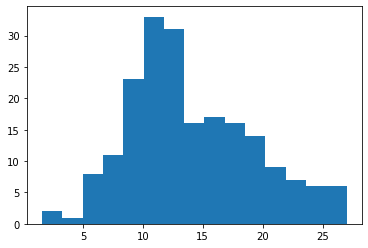

In [44]:
plt.hist(y, bins=15);

### Regresja wielomianowa

In [46]:
np.random.seed(0)

X = np.arange(-4, 4.2, 0.2)
y = ((X-2)*(X+4)*(X+1)*(X-1)*(X-3))/14 + np.random.normal(-2.5, 2.5, len(X) )

X = X.reshape(-1,1)

In [47]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

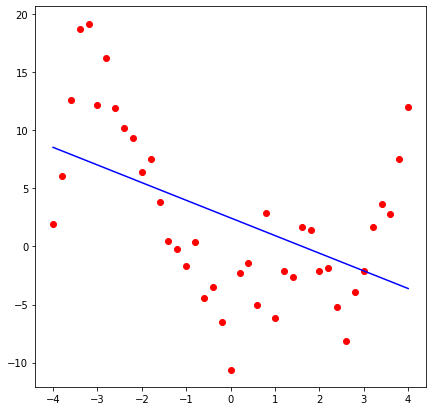

In [48]:
plt.figure(figsize=(7,7))
plt.scatter(X, y, c="r")
plt.plot(X, y_pred, c="b")

In [49]:
r2_score(y, y_pred)

0.2456973012029272

In [50]:
# przygotowanie danych X do regresji w stopniu >1
from sklearn.preprocessing import PolynomialFeatures

In [52]:
pf = PolynomialFeatures(degree=3)
X_poly = pf.fit_transform(X)

In [53]:
X[0]

array([-4.])

In [54]:
X_poly[0]

array([  1.,  -4.,  16., -64.])

In [56]:
X.shape, X_poly.shape

((41, 1), (41, 4))

D=2, R2=0.5697544037009782
D=3, R2=0.6700030934995909
D=4, R2=0.7207373198555
D=5, R2=0.8821376701269634
D=6, R2=0.8821777742034193
D=7, R2=0.8831826910348755
D=8, R2=0.8958108344779775
D=9, R2=0.89624163997818
D=10, R2=0.9081113947867436


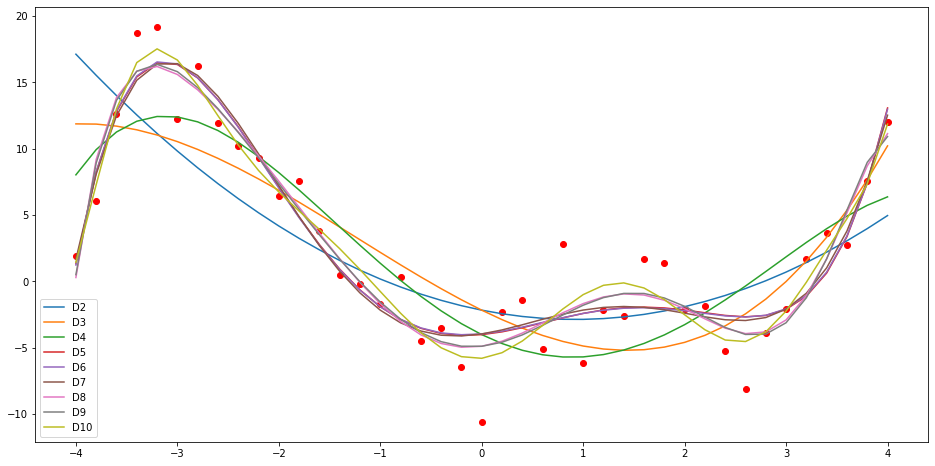

In [60]:
plt.figure(figsize=(16,8))
plt.scatter(X, y, c="r")

for degree in range(2,11):
    pf = PolynomialFeatures(degree)
    X_poly = pf.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    plt.plot(X, y_pred, label=f"D{degree}")
    print(f"D={degree}, R2={r2_score(y, y_pred)}")

plt.legend()
plt.show()

### Regularyzacji regresji

In [61]:
# klasy do regularyzacji
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [62]:
np.random.seed(0)
X = np.unique( np.random.uniform(-3, 3, 100) )
y = 1/2*(X**2) + X + 2 + np.random.normal(0, 1, len(X) )

X = X.reshape(-1,1)

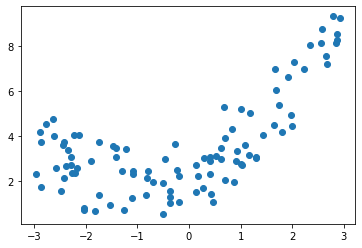

In [63]:
plt.scatter(X, y)

RW: R2=0.8398411453424146 
Lasso: R2=0.7560846372182832 
Ridge: R2=0.8375368368826693 
ElasticNet: R2=0.7609800429915305 


C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.8020675781386, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(
C:\Users\kurs\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.31831426733647, tolerance: 0.04559490152732705
  model = cd_fast.enet_coordinate_descent(


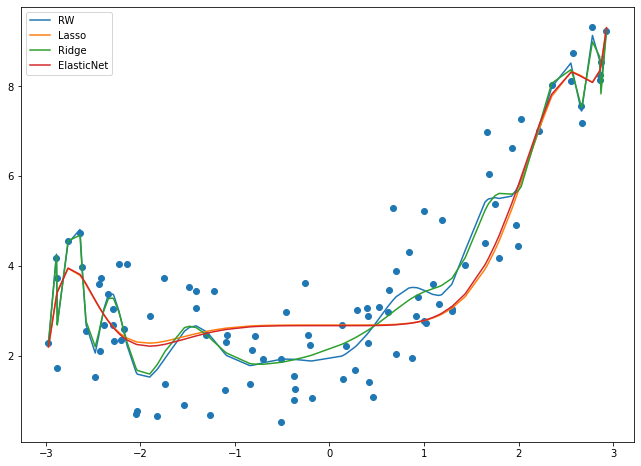

In [67]:
plt.figure(figsize=(11,8))
plt.scatter(X, y)

pf = PolynomialFeatures(degree=31)
X_poly = pf.fit_transform(X)

#RW
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="RW")
print(f"RW: R2={r2_score(y,y_pred)} ")

#Lasso
model = Lasso()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Lasso")
print(f"Lasso: R2={r2_score(y,y_pred)} ")

#Ridge
model = Ridge()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="Ridge")
print(f"Ridge: R2={r2_score(y,y_pred)} ")

#ElasticNet
model = ElasticNet()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
plt.plot(X, y_pred, label="ElasticNet")
print(f"ElasticNet: R2={r2_score(y,y_pred)} ")

plt.legend();

### Regresja wielozmienna

In [68]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [69]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [70]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [71]:
# konwersja z wart. imperialnych na metryczne
df.Height *= 2.54
df.Weight /= 2.2

In [72]:
df

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364
...,...,...,...
9995,Female,168.078536,62.171570
9996,Female,170.350573,77.667230
9997,Female,162.224700,58.397872
9998,Female,175.346978,74.478392


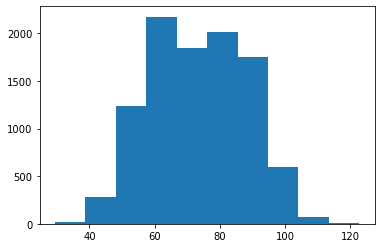

In [74]:
plt.hist(df.Weight);

In [75]:
import seaborn as sns

<AxesSubplot:xlabel='Weight', ylabel='Count'>

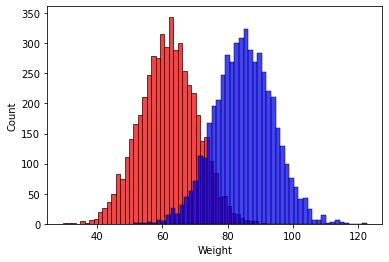

In [80]:
sns.histplot(df.query("Gender=='Female'").Weight, color="red")
sns.histplot(df.query("Gender=='Male'").Weight, color="blue")

In [83]:
df.Gender = df.Gender.map({
    "Male" : 0, "Female" : 1
})
df.sample(n=10, random_state=0)

,Gender,Height,Weight
9394,1,164.398647,62.766271
898,0,170.871313,85.165166
2398,0,189.283269,98.424178
5906,1,167.335236,59.891565
2343,0,164.709605,71.690199
8225,1,149.024221,44.780036
5506,1,164.597620,68.014522
6451,1,161.164020,60.688860
2670,0,174.046467,85.478788
3497,0,179.177192,95.544930


In [84]:
model = LinearRegression()
model.fit( df[["Gender","Height"]] , df.Weight )

LinearRegression()

In [85]:
model.coef_ , model.intercept_

(array([-8.80805024,  1.06960294]), -102.52081454490089)

In [86]:
pd.DataFrame(model.coef_, ["Gender","Height"] )

,0
Gender,-8.808050
Height,1.069603


In [90]:
model.predict([ [0, 192], [1,164], [0, 190] ])

array([102.84294991,  64.08601735, 100.70374403])

In [91]:
# formula do predykcji
height = 192
gender = 0

model.intercept_ + model.coef_[0]*gender + model.coef_[1]*height

102.84294990633599